In [1]:
# Importing relevant packages and establishing the Exadata connection

import sqlalchemy
import pandas as pd
import numpy as np
import getpass

password=getpass.getpass("Enter your password:")
engine = sqlalchemy.create_engine("oracle+cx_oracle://anantk[an_ct_ws38]:%s@exa_gbtukprdd_an" %(password))

Enter your password:········


In [21]:

result = engine.execute("drop table AK_FEAT_FAM6")
result = engine.execute("""
CREATE TABLE AK_FEAT_FAM6 AS 
SELECT A.* FROM 
AK_FEAT_FAM5 A
WHERE REGION IS NOT NULL AND CHANNEL_FLAG IS NOT NULL AND MAJORCOMPETITOR IS NOT NULL 
AND CATEGORY_DESC NOT IN ('SEASONA1 L.',
'BRAND&CONCES S.',
'ELECTRICA L.',
'FOOTWEARACCES S.',
'MEDIA&ENT S.',
'WOMENSWEA R.',
'HOM E.',
'TOYS&NURSER Y.',
'RECREATIO N.',
'SPORTSWEA1 R.',
'PAPERSHO P.',
'REUSABLEBAG S.',
'MENSWEA R.',
'KIDSANDBAB Y.',
'ESSENTIAL S.',
'NEWSMAG1 S.')
""")


In [41]:
## Using xdatadump to get transactions from exadata table
import subprocess
import os
from urllib import quote_plus as urlquote

# DROP TABLE ADJ_GER_TRANS;
# CREATE TABLE ADJ_GER_TRANS AS 
# SELECT DISTINCT  TRANSACTION_FID,PROD_MERCH_L20_CODE AS NSMGP,1 AS VALUE  
# FROM SMP10_TRAN_ITEM_FCT A INNER JOIN DATE_DIM D ON A.DATE_ID = D.DATE_ID 
# INNER JOIN PROD_DIM_C P ON A.PROD_ID = P.PROD_ID 
# WHERE a.DATE_ID BETWEEN '04-JUL-16' AND '01-JAN-17' AND PROD_MERCH_L20_CODE IN (SELECT DISTINCT TO_CHAR(mgp) FROM adj_mgp);

proxy = "anantk[an_ct_ws38]/%s@exa_gbtukprdd_an" %(password)

cmd_str =   "xdatadump userid='" + str(proxy) \
                + "' sqlstmt='SELECT  * FROM AK_FEAT_FAM_16 " \
                +  "' delimiter=^ header=y > ak_fam.csv"        

print cmd_str
subprocess.call(cmd_str, cwd='./', shell=True)

xdatadump userid='anantk[an_ct_ws38]/Messi123@exa_gbtukprdd_an' sqlstmt='SELECT  * FROM AK_FEAT_FAM_16 ' delimiter=^ header=y > ak_fam.csv


0

In [42]:
df = pd.read_csv('ak_fam.csv',delimiter = "^")

df.head()
# cols = df.columns

# df['channel'] = np.str(df['CHANNEL_FLAG'])

,DATE_ID,FIS_WEEK_ID,FIS_MONTH_ID,FIS_QUARTER_ID,CATEGORY_DESC,TF,REGION,MAJORCOMPETITOR,CHANNEL_FLAG,INDEX_OVR,...,JUL_FLAG,AUG_FLAG,SEP_FLAG,OCT_FLAG,NOV_FLAG,BANK_FLAG,BOOST_FLAG,WINE_FLAG,DAY_YR,MONTH_DAY_FLAG
0,2015-03-02 00:00:00,201501,201501,20151,GROCER Y.,Dawn,South,Sainsbury,3,Dawn,...,0,0,0,0,0,0,0,0,61,2
1,2015-03-02 00:00:00,201501,201501,20151,GROCER Y.,Dawn,North,Morrisons,1,Post F,...,0,0,0,0,0,0,0,0,61,2
2,2015-03-02 00:00:00,201501,201501,20151,MEATAGRI&LOCA L.,The Wicks,Central,Sainsbury,1,Dawn,...,0,0,0,0,0,0,0,0,61,2
3,2015-03-02 00:00:00,201501,201501,20151,IMPULS E.,Carol,Central,Asda,3,Family,...,0,0,0,0,0,0,0,0,61,2
4,2015-03-02 00:00:00,201501,201501,20151,IMPULS E.,The Mayers,Central,M&S/Waitrose,3,Wicks,...,0,0,0,0,0,0,0,0,61,2


In [5]:
# df.head()

df2 = df[df['FIS_WEEK_ID'] > 201601]

df2

,SALES,TP_SALES,DATE_ID,FIS_WEEK_ID,FIS_MONTH_ID,FIS_QUARTER_ID,CATEGORY_DESC,TF,REGION,MAJORCOMPETITOR,CHANNEL_FLAG,TPNB,INDEX_CA,INDEX_DA,INDEX_MA,INDEX_RO,INDEX_WI,INDEX_OVR,TP_DIST,TP_FLAG
1,260.0,240.0,2016-11-14 00:00:00,201638,201609,20163,CHILLE D.,The Wicks,Central,Morrisons,1,57050383,1.073034,1.052628,0.970473,0.893645,0.955174,Broad,0.082142,0
5,240.0,240.0,2017-01-05 00:00:00,201645,201611,20164,HOUSEHOLD&PE T.,Dawn,North,Asda,1,75438404,0.506940,1.316839,1.388765,0.822785,0.696905,Broad,0.082142,0
6,240.0,240.0,2016-10-12 00:00:00,201633,201608,20163,IMPULS E.,The Wicks,South,Asda,1,60707146,0.229439,0.317930,2.603040,0.502837,1.429678,Family,0.082142,0
7,240.0,240.0,2016-12-01 00:00:00,201640,201610,20164,IMPULS E.,Carol,North,Aldi/Lidl,1,70500598,1.107777,1.012143,0.810906,1.080033,1.022102,Broad,0.082142,0
8,260.0,240.0,2016-12-21 00:00:00,201643,201610,20164,IMPULS E.,Dawn,Central,Aldi/Lidl,1,51931554,0.771571,1.548498,0.948380,0.958007,0.470960,Dawn,0.082142,0
14,240.0,240.0,2016-11-03 00:00:00,201636,201609,20163,BW S.,Dawn,Central,Aldi/Lidl,1,61361003,0.722703,0.776069,1.304849,1.390294,1.031217,Broad,0.082142,0
15,260.0,240.0,2016-05-22 00:00:00,201612,201603,20161,PRODUC E.,The Mayers,Central,Morrisons,3,57431537,0.952671,1.049721,1.077533,0.856706,0.981751,Broad,0.082142,0
16,240.0,240.0,2016-10-04 00:00:00,201632,201608,20163,HB&WELLNES S.,Roshni,South,Sainsbury,1,71998421,0.986158,1.367450,0.813513,1.049164,0.625190,Dawn,0.082142,0
17,320.0,240.0,2016-09-05 00:00:00,201628,201607,20163,HOUSEHOLD&PE T.,Carol,Central,Morrisons,1,77899385,1.072404,0.730705,0.869272,1.020751,1.438365,Wicks,0.082142,0
18,240.0,240.0,2017-01-13 00:00:00,201646,201611,20164,CHILLE D.,Roshni,Central,Morrisons,1,58771948,1.055314,1.480885,0.873876,0.717868,0.547634,Dawn,0.082142,0


In [43]:
df.dtypes

DATE_ID             object
FIS_WEEK_ID          int64
FIS_MONTH_ID         int64
FIS_QUARTER_ID       int64
CATEGORY_DESC       object
TF                  object
REGION              object
MAJORCOMPETITOR     object
CHANNEL_FLAG         int64
INDEX_OVR           object
SALES              float64
TP_SALES           float64
TP_FLAG              int64
WKND_FLAG            int64
TUE_FLAG             int64
WED_FLAG             int64
THU_FLAG             int64
FRI_FLAG             int64
SAT_FLAG             int64
SUN_FLAG             int64
DEC_FLAG             int64
FEB_FLAG             int64
MAR_FLAG             int64
APR_FLAG             int64
MAY_FLAG             int64
JUN_FLAG             int64
JUL_FLAG             int64
AUG_FLAG             int64
SEP_FLAG             int64
OCT_FLAG             int64
NOV_FLAG             int64
BANK_FLAG            int64
BOOST_FLAG           int64
WINE_FLAG            int64
DAY_YR               int64
MONTH_DAY_FLAG       int64
dtype: object

In [44]:
cat_cols = ['REGION','MAJORCOMPETITOR','CATEGORY_DESC','TF','INDEX_OVR']

df1 = pd.get_dummies(df[cat_cols])

df1.head()

,REGION_Central,REGION_London,REGION_North,REGION_South,MAJORCOMPETITOR_Aldi/Lidl,MAJORCOMPETITOR_Asda,MAJORCOMPETITOR_Co-Op,MAJORCOMPETITOR_M&S/Waitrose,MAJORCOMPETITOR_Morrisons,MAJORCOMPETITOR_Other,...,TF_The Wicks,TF_other,INDEX_OVR_Broad,INDEX_OVR_Carol,INDEX_OVR_Dawn,INDEX_OVR_Family,INDEX_OVR_Mayers,INDEX_OVR_Post F,INDEX_OVR_Roshni,INDEX_OVR_Wicks
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df3 = pd.concat([df,df1], axis = 1)

cols_to_drop = ['DATE_ID','SALES','CHANNEL_FLAG','TF','REGION','MAJORCOMPETITOR','CATEGORY_DESC','INDEX_OVR',
                'FIS_QUARTER_ID','FIS_MONTH_ID', 'TP_SALES', 'WKND_FLAG','DAY_YR','WINE_FLAG','BOOST_FLAG','MONTH_DAY_FLAG']

df3.drop(cols_to_drop,axis = 1,inplace = True)

df3.head()

,FIS_WEEK_ID,TP_FLAG,TUE_FLAG,WED_FLAG,THU_FLAG,FRI_FLAG,SAT_FLAG,SUN_FLAG,DEC_FLAG,FEB_FLAG,...,TF_The Wicks,TF_other,INDEX_OVR_Broad,INDEX_OVR_Carol,INDEX_OVR_Dawn,INDEX_OVR_Family,INDEX_OVR_Mayers,INDEX_OVR_Post F,INDEX_OVR_Roshni,INDEX_OVR_Wicks
0,201501,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,201501,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,201501,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,201501,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,201501,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
print df3.columns

print df3.dtypes

Index([u'FIS_WEEK_ID', u'TP_FLAG', u'TUE_FLAG', u'WED_FLAG', u'THU_FLAG',
       u'FRI_FLAG', u'SAT_FLAG', u'SUN_FLAG', u'DEC_FLAG', u'FEB_FLAG',
       u'MAR_FLAG', u'APR_FLAG', u'MAY_FLAG', u'JUN_FLAG', u'JUL_FLAG',
       u'AUG_FLAG', u'SEP_FLAG', u'OCT_FLAG', u'NOV_FLAG', u'BANK_FLAG',
       u'REGION_Central', u'REGION_London', u'REGION_North', u'REGION_South',
       u'MAJORCOMPETITOR_Aldi/Lidl', u'MAJORCOMPETITOR_Asda',
       u'MAJORCOMPETITOR_Co-Op', u'MAJORCOMPETITOR_M&S/Waitrose',
       u'MAJORCOMPETITOR_Morrisons', u'MAJORCOMPETITOR_Other',
       u'MAJORCOMPETITOR_Sainsbury', u'CATEGORY_DESC_BAKER Y.',
       u'CATEGORY_DESC_BW S.', u'CATEGORY_DESC_CHILLE D.',
       u'CATEGORY_DESC_EUPHORIU M.', u'CATEGORY_DESC_FROZE N.',
       u'CATEGORY_DESC_GROCER Y.', u'CATEGORY_DESC_HB&WELLNES S.',
       u'CATEGORY_DESC_HOUSEHOLD&PE T.', u'CATEGORY_DESC_IMPULS E.',
       u'CATEGORY_DESC_MEATAGRI&LOCA L.', u'CATEGORY_DESC_PRODUC E.',
       u'TF_Carol', u'TF_Dawn', u'TF_Roshni', u

In [47]:
Y = df3.TP_FLAG

df3.drop('TP_FLAG',axis = 1, inplace = True)


In [50]:
df3 =  df3[df3.columns[~df3.columns.str.contains('REGION')]]

df3.head()

,FIS_WEEK_ID,TUE_FLAG,WED_FLAG,THU_FLAG,FRI_FLAG,SAT_FLAG,SUN_FLAG,DEC_FLAG,FEB_FLAG,MAR_FLAG,...,TF_The Wicks,TF_other,INDEX_OVR_Broad,INDEX_OVR_Carol,INDEX_OVR_Dawn,INDEX_OVR_Family,INDEX_OVR_Mayers,INDEX_OVR_Post F,INDEX_OVR_Roshni,INDEX_OVR_Wicks
0,201501,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,201501,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,201501,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,201501,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,201501,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [54]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

df3.fillna(0, inplace = True)

X_train = scaler.fit_transform(df3)

# X_train = df3

# forest = RandomForestClassifier(n_estimators=250, max_depth= 6,
#                                 max_features= 'sqrt', min_samples_split = 2 ,bootstrap=True,n_jobs=-1, 
#                                 oob_score = True, random_state=3, verbose=1)
forest = LogisticRegression(penalty='l2', C = 3.0, fit_intercept=True, intercept_scaling=1, 
                                        class_weight=None, random_state=None, solver='liblinear', max_iter=100, 
                                        multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1)
forest.fit(X_train,Y)
# print("rmse_train: " + str(np.sqrt(metrics.mean_squared_error(Y,forest.predict(X_train)))))
print("roc_train: " + str(metrics.roc_auc_score(Y,forest.predict(X_train))))


roc_train: 0.596084843156


In [52]:
# fcoef = forest.coef_.reshape(-1,1)
Coeff = pd.DataFrame(forest.coef_.T)

Coeff.set_index(df3.columns)

,0
FIS_WEEK_ID,0.000632
TUE_FLAG,0.006242
WED_FLAG,-0.008078
THU_FLAG,0.022955
FRI_FLAG,0.041731
SAT_FLAG,0.029915
SUN_FLAG,-0.027234
DEC_FLAG,-0.010821
FEB_FLAG,0.021970
MAR_FLAG,0.034303


In [19]:
# forest.oob_score_

print("rmse_train: " + str(np.sqrt(metrics.mean_squared_error(Y,forest.predict(X_train)))))

[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:   26.5s
[Parallel(n_jobs=64)]: Done 250 out of 250 | elapsed:  1.1min finished


rmse_train: 225.993730813


Features sorted by their score:
[(0.1628, 'CATEGORY_DESC_IMPULS E.'), (0.1403, 'MAJORCOMPETITOR_Sainsbury'), (0.1135, 'MAJORCOMPETITOR_Other'), (0.1038, 'MAJORCOMPETITOR_Asda'), (0.0902, 'REGION_London'), (0.0874, 'MAJORCOMPETITOR_Co-Op'), (0.0625, 'REGION_North'), (0.0559, 'REGION_South'), (0.0471, 'MAJORCOMPETITOR_M&S/Waitrose'), (0.0423, 'CATEGORY_DESC_BAKER Y.'), (0.0317, 'CATEGORY_DESC_BW S.'), (0.0158, 'REGION_Central'), (0.0119, 'MAJORCOMPETITOR_Morrisons'), (0.0112, 'CATEGORY_DESC_FROZE N.'), (0.0096, 'MAJORCOMPETITOR_Aldi/Lidl'), (0.0081, 'CATEGORY_DESC_MEATAGRI&LOCA L.'), (0.003, 'CATEGORY_DESC_CHILLE D.'), (0.0016, 'CATEGORY_DESC_HOUSEHOLD&PE T.'), (0.0004, 'CATEGORY_DESC_PRODUC E.'), (0.0004, 'CATEGORY_DESC_HB&WELLNES S.'), (0.0004, 'CATEGORY_DESC_GROCER Y.'), (0.0, 'CATEGORY_DESC_EUPHORIU M.')]


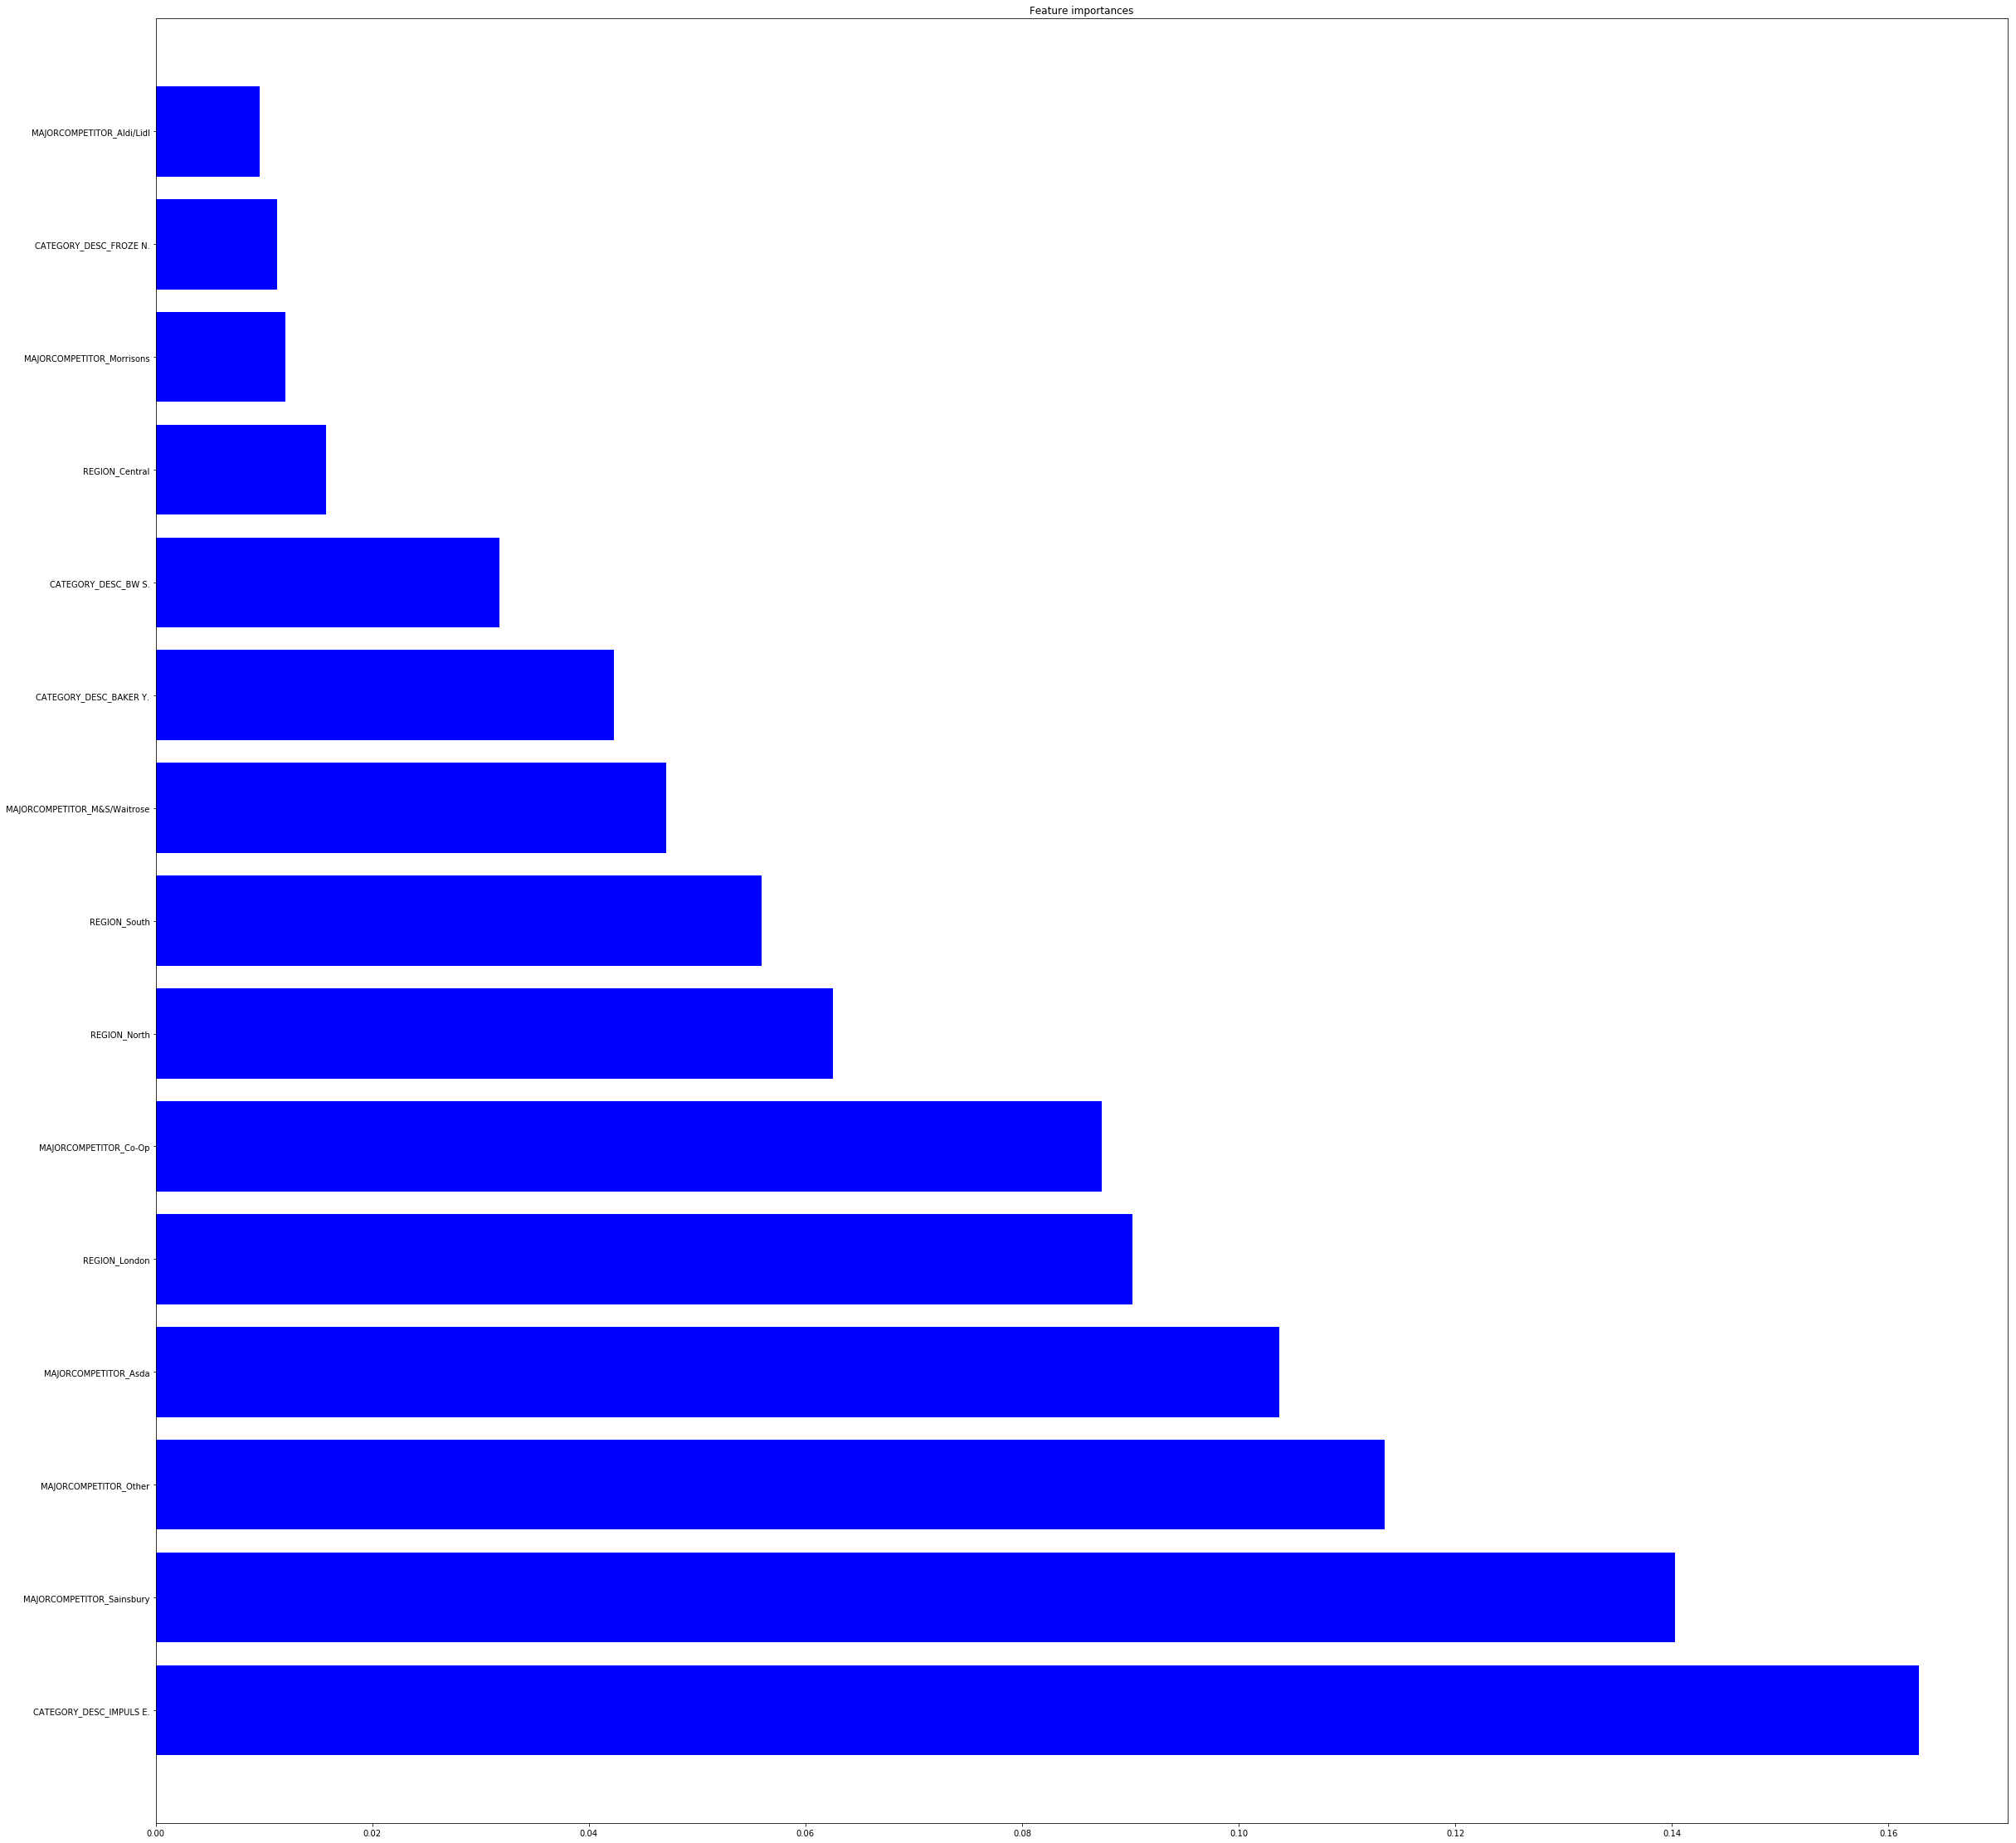

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), df_mayers.columns), 
             reverse=True))

indices = np.argsort(forest.feature_importances_)[::-1]
indices = indices[0:15]
# Plot the feature importances of the forest
plt.figure(figsize=(40,40))
plt.title("Feature importances")
plt.barh(range(15), forest.feature_importances_[indices],
       color="b",  align="center")
plt.yticks(range(15), df_mayers.columns[indices])
plt.ylim([-1, 15])
plt.show()

In [11]:
pd.DataFrame((sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), df3.columns), 
             reverse=True)))

,0,1
0,0.5852,REGION_London
1,0.0824,REGION_Central
2,0.0606,REGION_South
3,0.0536,REGION_North
4,0.0348,TF_other
5,0.0283,MAJORCOMPETITOR_Other
6,0.0258,INDEX_OVR_Broad
7,0.0242,MAJORCOMPETITOR_Co-Op
8,0.0188,CATEGORY_DESC_EUPHORIU M.
9,0.0135,CATEGORY_DESC_PRODUC E.


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import RidgeCV

alpha = np.logspace(-2,3,50)
# alpha = np.linspace(20,90,20)

def rms(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse  = make_scorer(rms, greater_is_better=False)

#########RIDGE#################

X_train = scaler.fit_transform(df3)

print 'Ridge regression results'
modelr=RidgeCV(alphas=alpha, fit_intercept=True, normalize=False, scoring=rmse, cv=None)
modelr.fit(X_train,Y)

Y_predr=modelr.predict(X_train)
rmse_trainr = np.sqrt(mean_squared_error((Y_train), (Y_predr)))
print 'RMSE: %d' % (rmse_trainr)
print 'Regularisation param: %d'%(modelr.alpha_)

end_time = time()
time_taken = end_time - start_time # time_taken is in seconds
minutes, seconds = divmod(time_taken, 60)

# Y_valid_predr=modelr.predict(X_valid)
# rmse_validr = np.sqrt(mean_squared_error((Y_valid), (Y_valid_predr)))
# print 'RMSE validation data: %d' % (rmse_validr)
# print("Fit took %d minutes and %d seconds" %(minutes, seconds) )   



Ridge regression results
